# *UTS Deep Learning No. 2*

## Muhamad Nabil Firdaus
## 2602190103

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rn

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
PATH = 'C:\\Users\\nabil\\Desktop\\UTS_DeepLearning\\parkinson_xray'

IMG_WIDTH = 64
IMG_HEIGHT = 264

Setiap direktori mewakili kelas yang berbeda, dan semua gambar dimuat, diubah ukurannya, dan dikonversi ke grayscale. Gambar-gambar tersebut kemudian disimpan sebagai array, dan setiap gambar diberi label dengan indeks kelas yang sesuai.

1. **Inisialisasi**: Daftar kosong (`images` dan `classes`) dibuat untuk menyimpan data gambar dan label kelas mereka. Dictionary kosong (`labels`) juga diinisialisasi untuk memetakan indeks kelas ke nama kelas.

2. **Memuat Gambar**:
   - Kode melakukan perulangan pada setiap direktori kelas yang ada di dalam `PATH` dan memuat gambar-gambar yang ada di dalam setiap direktori.
   - Gambar-gambar tersebut diubah ukurannya ke ukuran target yang sudah ditentukan dan dikonversi menjadi grayscale.
   - Setiap gambar kemudian diubah menjadi array yang bisa digunakan oleh model.

3. **Menyimpan Data**:
   - Label kelas (yang berupa indeks numerik) ditambahkan ke daftar `classes`, sementara array gambar ditambahkan ke daftar `images`.
   - Dictionary `labels` diisi dengan pemetaan antara label kelas numerik dan nama kelas (nama direktori).

4. **Pesan Status**:
   - Setelah gambar berhasil dimuat dari setiap direktori kelas, pesan konfirmasi dicetak.

Proses ini memastikan gambar-gambar diproses dan diberi label dengan benar untuk pelatihan model pembelajaran mesin.


In [19]:
images = []
classes = []
labels = {}

for i, class_dir in enumerate(os.listdir(PATH)):
  for filename in os.listdir(os.path.join(PATH, class_dir)):
    image = load_img(os.path.join(PATH, class_dir, filename), target_size=(IMG_WIDTH, IMG_HEIGHT), color_mode='grayscale')
    image = img_to_array(image)

    classes.append(i)
    images.append(image)
  
  labels[i] = class_dir

  print(f'Load successful from class {class_dir}')

Load successful from class NORMAL
Load successful from class PNEUMONIA


menampilkan beberapa gambar secara acak dalam bentuk grid menggunakan `matplotlib`. Gambar-gambar ini dipilih secara acak dari daftar `images` dan ditampilkan dalam format grayscale.

1. **Membuat Grid**: 
   -  membuat grid subplot 5x2 (5 baris dan 2 kolom) untuk menampilkan 10 gambar.
   

2. **Menampilkan Gambar Secara Acak**:
   - Setiap gambar dipilih secara acak dari daftar `images` menggunakan `rn.randint()`.
   - Gambar ditampilkan dalam mode grayscale dengan menggunakan parameter `cmap='gray'`, dan sumbu pada setiap subplot dinonaktifkan dengan `axis('off')`.

3. **Menyesuaikan Layout dan Menampilkan**:
   - Fungsi `plt.tight_layout()` digunakan untuk mengatur agar tampilan tidak tumpang tindih.
   - Akhirnya, gambar ditampilkan dengan `plt.show()`.

Dengan cara ini, kita dapat melihat contoh gambar dari dataset yang telah diproses secara acak dalam grid yang teratur.


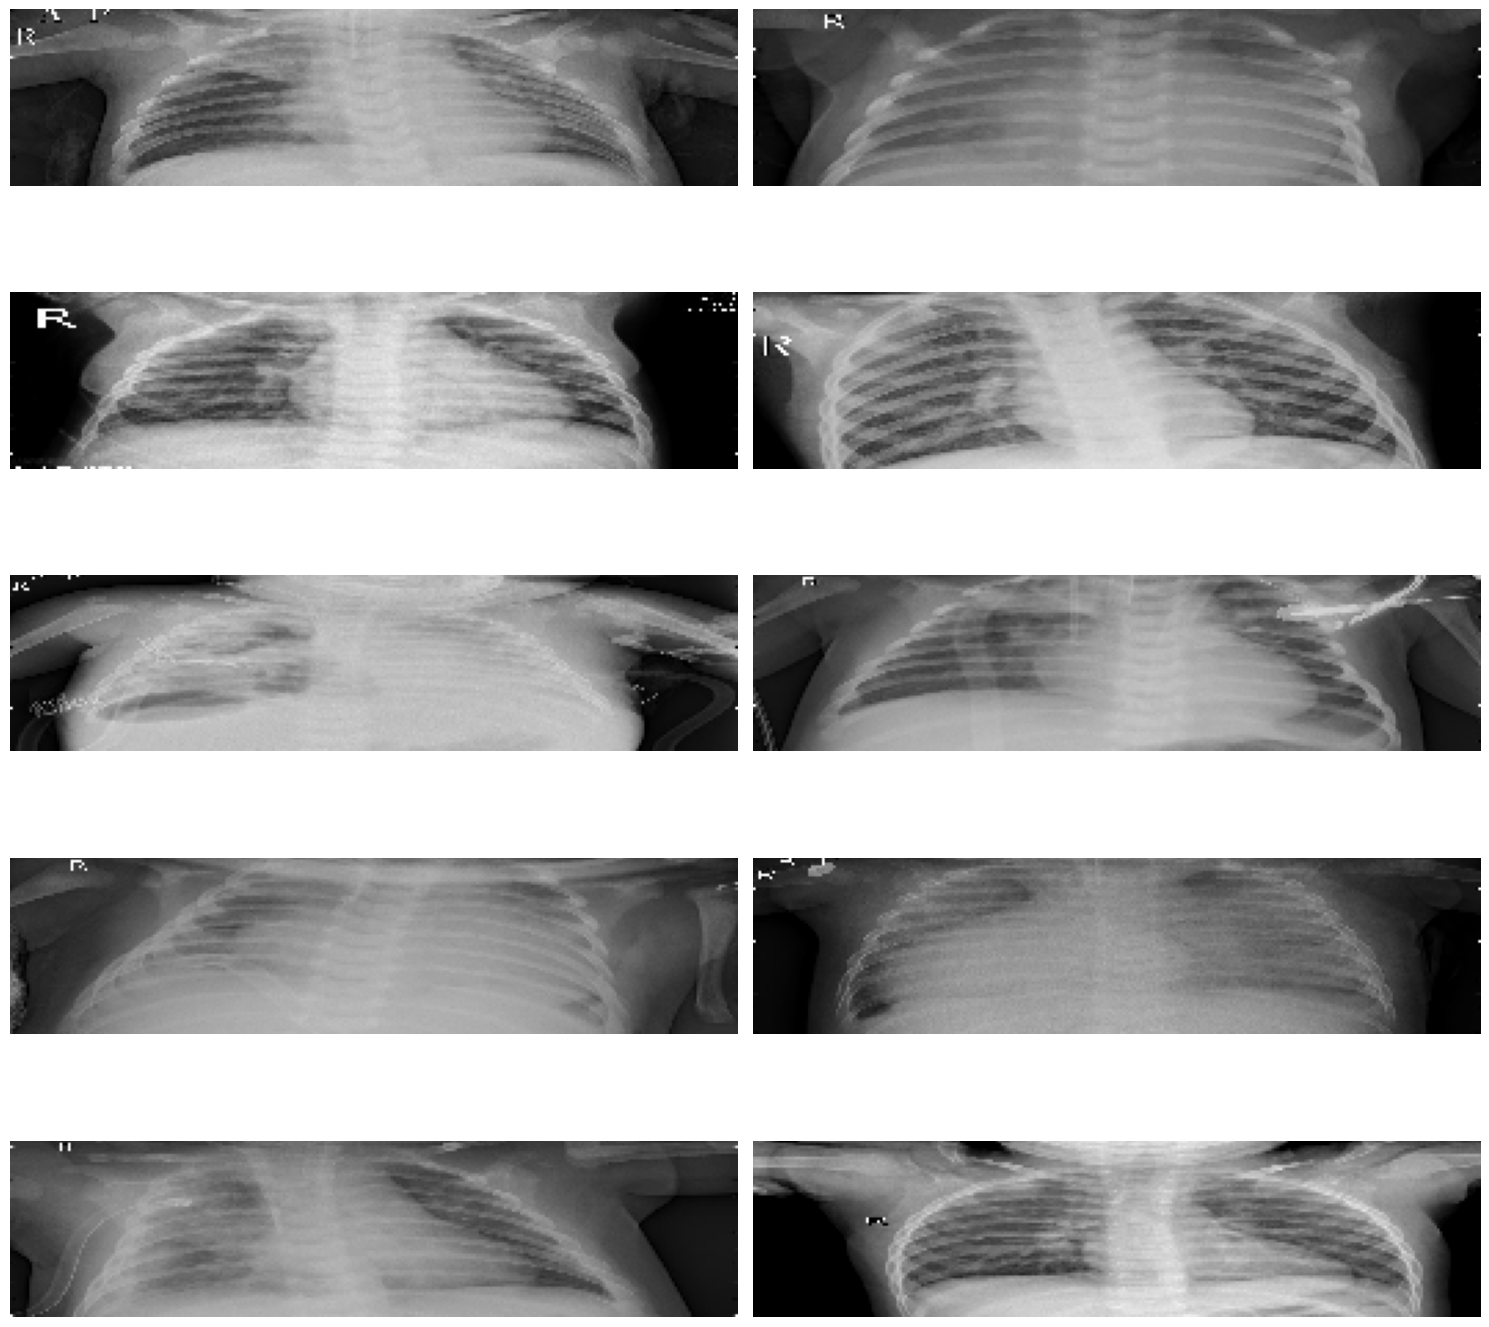

In [20]:
# Menampilkan beberapa gambar
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

for i in range(5):
    for j in range(2):
        l = rn.randint(0, len(images) - 1)  # Indeks acak untuk gambar yang valid
        ax[i, j].imshow(images[l].squeeze(), cmap='gray')  # Menampilkan gambar dengan cmap='gray'

        ax[i, j].axis('off')  # Menonaktifkan sumbu

plt.tight_layout()  # Menyesuaikan layout agar tidak tumpang tindih
plt.show()  # Menampilkan gambar

 menampilkan beberapa gambar secara acak dari daftar `images` dan menambahkan judul untuk setiap gambar berdasarkan kelasnya.

1. **Membuat Grid untuk Subplot**:
   - `fig, ax = plt.subplots(5, 2)`: Membuat grid subplot dengan 5 baris dan 2 kolom, sehingga totalnya ada 10 gambar yang akan ditampilkan.
   - `fig.set_size_inches(15, 15)`: Mengatur ukuran gambar (figure) menjadi 15 inci x 15 inci untuk tampilan yang lebih besar.

2. **Perulangan untuk Menampilkan Gambar Secara Acak**:
   - `for i in range(5)` dan `for j in range(2)`: Melakukan perulangan untuk mengisi setiap posisi dalam grid 5x2 (5 baris dan 2 kolom), yang berarti menampilkan 10 gambar.
   - `l = rn.randint(0, len(classes))`: Menghasilkan angka acak `l` yang digunakan untuk memilih gambar dan kelas yang sesuai dari daftar `images` dan `classes`. `rn.randint(0, len(classes))` menghasilkan angka acak antara 0 dan panjang dari daftar `classes`.
   - `ax[i, j].imshow(images[l])`: Menampilkan gambar yang dipilih secara acak pada subplot yang sesuai (`ax[i, j]`).
   - `ax[i, j].set_title('Vehicle' + str(classes[l]))`: Menambahkan judul pada setiap subplot sesuai dengan kelas gambar. Judul akan berbentuk `'Vehicle'` diikuti dengan kelas gambar yang diambil dari daftar `classes`.

3. **Mengatur Layout dan Menampilkan Gambar**:
   - `plt.tight_layout()`: Fungsi ini digunakan untuk menyesuaikan layout agar tidak ada elemen yang saling bertumpuk dan setiap gambar terlihat dengan jelas.
   
Dengan demikian, kode ini menampilkan 10 gambar secara acak dalam grid 5x2, dan setiap gambar akan memiliki judul yang menunjukkan kelasnya (misalnya, `Vehicle0`, `Vehicle1`, dll.).


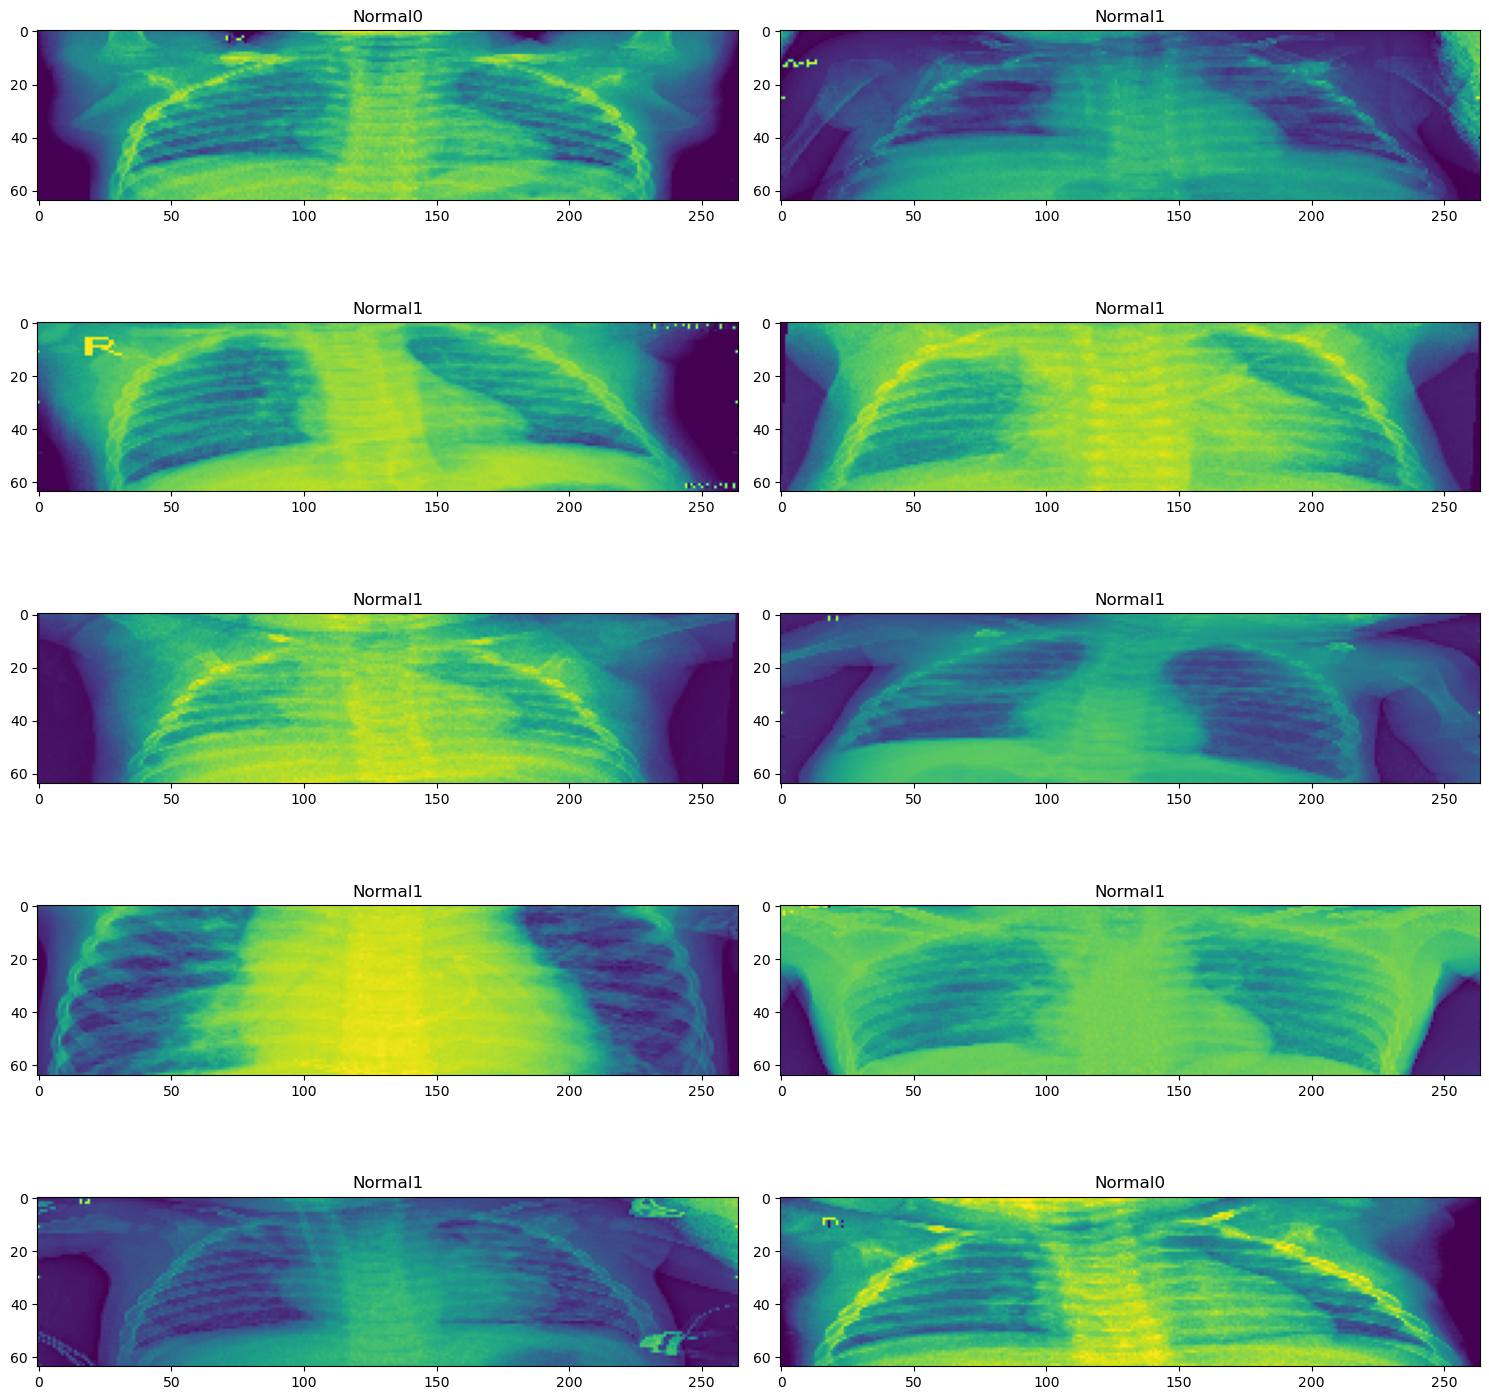

In [21]:
import random as rn
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(classes))
        ax[i,j].imshow(images[l])
        ax[i,j].set_title('Normal' + str(classes[l]))
        
plt.tight_layout()

In [22]:
   #X adalah fitur dan y adalah target
X = images  # Gambar
y = classes  # Label



In [23]:
from sklearn.model_selection import train_test_split



#  X adalah fitur dan y adalah target
#memisahkan 30% dari data sebagai set sementara (validation + test set)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

 #membagi data sementara menjadi 20% validation set dan 10% test set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Hasilnya:
# - X_train, y_train : 70% data untuk training
# - X_val, y_val : 20% data untuk validation
# - X_test, y_test : 10% data untuk testing



### Kesimpulan:
- **Training set (70%)**: Digunakan untuk melatih model.
- **Validation set (20%)**: Digunakan untuk memilih hyperparameter dan mencegah overfitting.
- **Test set (10%)**: Digunakan untuk mengevaluasi kinerja model pada data yang tidak pernah dilihat sebelumnya.

Markdown ini akan memberikan penjelasan yang jelas dan mudah dipahami mengenai pembagian dataset yang dilakukan dalam kode.


In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Pastikan X_train dan y_train adalah array NumPy
X_train = np.array(X_train)  # Jika X_train masih dalam format list, konversi ke array NumPy
y_train = np.array(y_train)  # Pastikan y_train adalah array NumPy juga

X_val = np.array(X_val)
y_val = np.array(y_val)

# Membuat model Sequential
model = models.Sequential()

# Menambahkan layer konvolusi pertama
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 264, 1)))

# Menambahkan layer pooling (untuk mengurangi dimensi)
model.add(layers.MaxPooling2D((2, 2)))

# Menambahkan layer konvolusi kedua
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Menambahkan layer pooling kedua
model.add(layers.MaxPooling2D((2, 2)))

# Mengubah dimensi untuk fully connected layer (flatten)
model.add(layers.Flatten())

# Menambahkan hidden layer
model.add(layers.Dense(128, activation='relu'))

# Menambahkan layer output dengan sigmoid activation function
model.add(layers.Dense(1, activation='sigmoid'))

# Menyusun model dengan optimizer Adam dan loss binary_crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan arsitektur model
model.summary()

# Melatih model dengan 5 epoch
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))



c:\Users\nabil\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 262, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 131, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 129, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 57344)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │     7,340,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,359,105 (28.07 MB)

 Trainable params: 7,359,105 (28.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 61s 470ms/step - accuracy: 0.7376 - loss: 59.4772 - val_accuracy: 0.8763 - val_loss: 0.3464
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 40s 350ms/step - accuracy: 0.9173 - loss: 0.2404 - val_accuracy: 0.8802 - val_loss: 0.4206
Epoch 3/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 47s 399ms/step - accuracy: 0.9446 - loss: 0.1915 - val_accuracy: 0.9041 - val_loss: 0.3263
Epoch 4/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 48s 414ms/step - accuracy: 0.9739 - loss: 0.0751 - val_accuracy: 0.9386 - val_loss: 0.2469
Epoch 5/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 46s 400ms/step - accuracy: 0.9802 - loss: 0.0685 - val_accuracy: 0.9377 - val_loss: 0.3553


### Pembentukan dan Pelatihan Model Convolutional Neural Network (CNN)

Pada bagian ini, kita akan membangun dan melatih model **Convolutional Neural Network (CNN)** untuk klasifikasi citra menggunakan framework **TensorFlow** dan **Keras**. CNN adalah jenis jaringan saraf yang sangat efektif dalam memproses data berupa citra atau gambar, dengan kemampuan untuk mendeteksi fitur-fitur penting pada gambar melalui lapisan konvolusi dan pooling.

#### 1. Menyiapkan Data
Sebelum membangun model, kita pastikan bahwa data pelatihan dan validasi dalam format yang dapat digunakan oleh model **Keras**. Data pelatihan (`X_train`, `y_train`) dan data validasi (`X_val`, `y_val`) harus dalam bentuk **array NumPy**, karena **Keras** membutuhkan data dalam format ini.




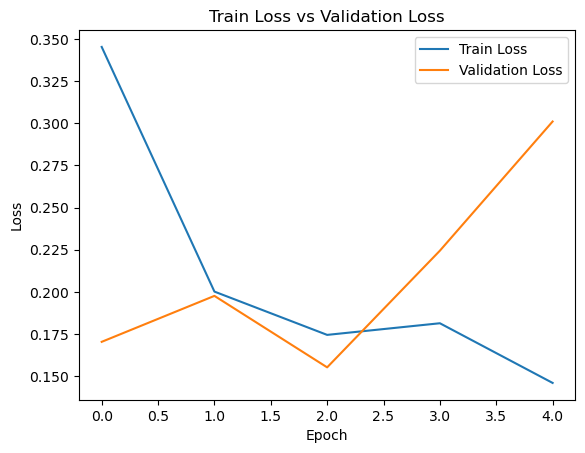

In [20]:
import matplotlib.pyplot as plt

# Membuat grafik train loss dan validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train Loss vs Validation Loss')
plt.show()


### Visualisasi Grafik Train Loss vs Validation Loss

untuk grafik train loss dan validation loss 
Train Loss:
 nilai kerugian (loss) yang dihitung pada data pelatihan setelah setiap epoch.
Jika model belajar dengan baik, train loss akan menurun seiring bertambahnya epoch, yang menunjukkan bahwa model semakin baik dalam memprediksi data pelatihan.

Validation Loss:
nilai kerugian yang dihitung pada data validasi (data yang tidak digunakan dalam pelatihan tetapi digunakan untuk mengukur kinerja model secara umum).
Validation loss biasanya juga menurun pada awalnya, tetapi seiring berjalannya waktu, validation loss bisa mulai meningkat meskipun train loss terus menurun.

Setelah melatih model, sangat penting untuk memantau bagaimana model belajar dan apakah terjadi overfitting atau underfitting. Salah satu cara untuk melakukannya adalah dengan memvisualisasikan **loss** selama proses pelatihan. Grafik ini akan menampilkan dua kurva, yaitu **Train Loss** dan **Validation Loss**, untuk membantu kita menganalisis kinerja model pada data pelatihan dan data validasi.

#### 1. Train Loss
**Train Loss** mengukur kesalahan model pada data pelatihan setelah setiap epoch. Nilai loss yang lebih rendah menunjukkan bahwa model semakin baik dalam memprediksi data pelatihan.

#### 2. Validation Loss
**Validation Loss** mengukur kesalahan model pada data validasi yang tidak digunakan selama pelatihan. Ini penting untuk memastikan bahwa model tidak hanya menghafal data pelatihan (overfitting), tetapi dapat menggeneralisasi dengan baik ke data yang belum pernah dilihat sebelumnya.





In [22]:
# Convert probabilities to class labels for binary classification
y_pred_labels = (y_pred > 0.5).astype(int)  # Assuming y_pred contains probabilities


In [23]:
# Convert probabilities to class labels for multi-class classification
y_pred_labels = np.argmax(y_pred, axis=1)


In [25]:
y_test_labels = np.argmax(y_test, axis=1)  # For multi-class
# For binary classification:
y_test_labels = np.where(y_test[:, 0] == 1, 0, 1)  # Assuming binary with one-hot encoding


In [30]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_test is one-hot encoded and y_pred contains probabilities
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test to class labels
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Evaluate model
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

print("Confusion Matrix:")
cm = confusion_matrix(y_test_labels, y_pred_labels)
print(cm)

Accuracy: 0.89272030651341
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.58      0.73       132
           1       0.88      1.00      0.93       390

    accuracy                           0.89       522
   macro avg       0.93      0.79      0.83       522
weighted avg       0.90      0.89      0.88       522

Confusion Matrix:
[[ 77  55]
 [  1 389]]


### Evaluasi Model dengan Akurasi, Classification Report, dan Confusion Matrix

Setelah model selesai dilatih, evaluasi kinerjanya pada data pengujian (test set) sangat penting. Salah satu cara untuk melakukannya adalah dengan menghitung **Akurasi**
#### 1. **Akurasi (Accuracy)**
Akurasi mengukur persentase prediksi yang benar dibandingkan dengan jumlah total sampel. Akurasi dihitung dengan membandingkan prediksi model dengan label sebenarnya. Nilai akurasi yang tinggi menunjukkan bahwa model mampu memprediksi kelas dengan benar pada sebagian besar data.




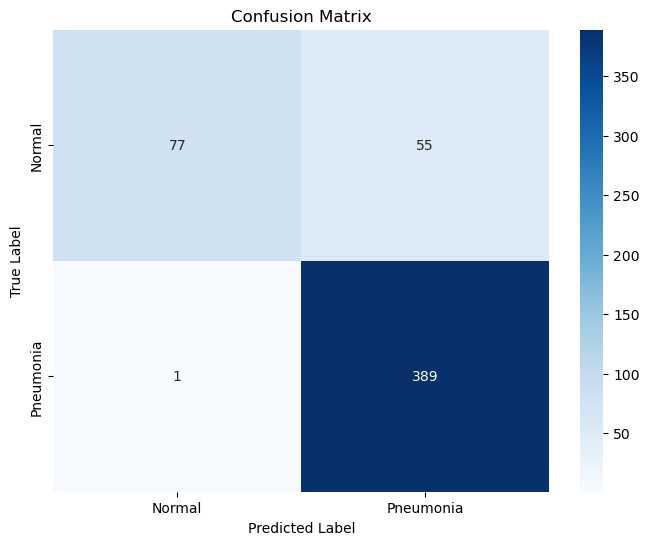

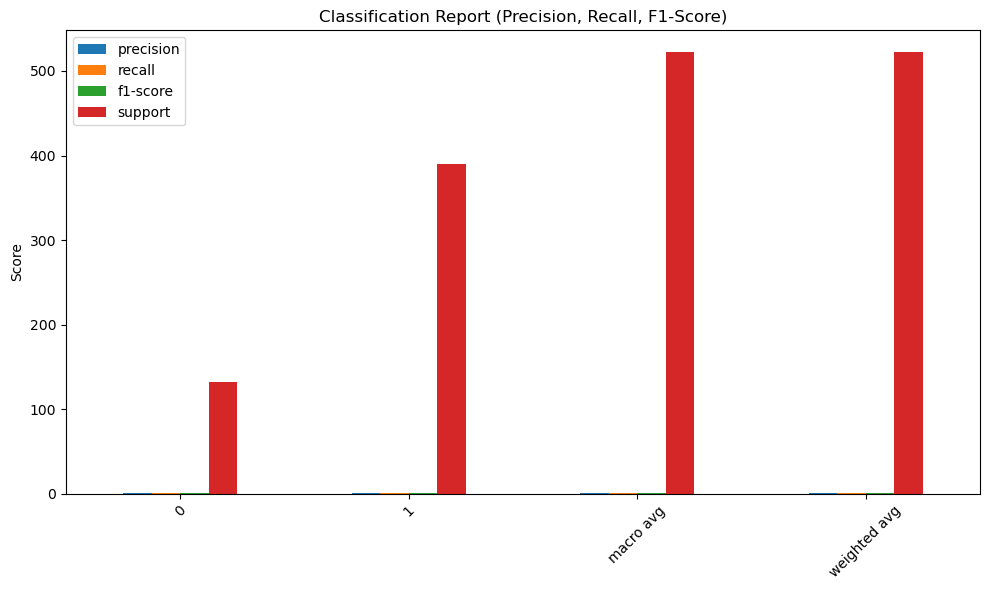

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Assuming y_test_labels and y_pred_labels are already defined
# y_test_labels = np.argmax(y_test, axis=1)  # For one-hot encoded y_test
# y_pred_labels = np.argmax(y_pred, axis=1)  # For model predictions

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print Classification Report
report = classification_report(y_test_labels, y_pred_labels, output_dict=True)

# Convert classification report to DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Check if 'accuracy' exists and drop it if present
if 'accuracy' in report_df.index:
    report_df.drop('accuracy', axis=0, inplace=True)

# Plot the Classification Report
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report (Precision, Recall, F1-Score)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Visualisasi Confusion Matrix dan Laporan Klasifikasi

Pada bagian ini, saya  menggunakan dua jenis visualisasi untuk mengevaluasi kinerja model klasifikasi yang telah dilatih:

1. **Confusion Matrix** (Matriks Kebingungannya)
2. **Classification Report** (Laporan Klasifikasi)

#### 1. **Confusion Matrix**
Confusion matrix adalah alat yang berguna untuk mengevaluasi kinerja model klasifikasi. Matriks ini memberikan gambaran tentang bagaimana model memprediksi kelas-kelas yang ada. Matriks ini menunjukkan jumlah prediksi yang benar (diagonal utama) dan kesalahan prediksi (sel di luar diagonal).

Visualisasi confusion matrix menggunakan **heatmap** akan membantu kita melihat dengan jelas perbandingan antara **kelas yang diprediksi** dan **kelas yang sebenarnya**. Dengan demikian, kita bisa mengetahui apakah model lebih cenderung salah dalam memprediksi salah satu kelas dibandingkan dengan yang lain.

#### 2. **Classification Report**
Laporan klasifikasi memberikan beberapa metrik penting yang menggambarkan kinerja model dalam hal:
- **Precision**: Seberapa tepat prediksi model (seberapa banyak prediksi benar di antara yang diprediksi positif).
- **Recall**: Seberapa banyak prediksi positif yang berhasil ditangkap oleh model (seberapa banyak dari seluruh data positif yang berhasil diprediksi).
- **F1-Score**: Merupakan gabungan dari precision dan recall, memberikan gambaran yang lebih jelas tentang kinerja model secara keseluruhan.

Laporan ini sangat berguna untuk memahami seberapa baik model kita dalam mengenali kelas-kelas yang ada dan melihat jika ada kelas yang sulit untuk diprediksi dengan baik.

---

### Visualisasi Confusion Matrix

Confusion matrix diplot menggunakan **seaborn heatmap**, yang memberi visualisasi lebih jelas mengenai bagaimana hasil prediksi model dibandingkan dengan data asli.

- **Diagonal utama**: Menunjukkan jumlah prediksi yang benar.
- **Di luar diagonal**: Menunjukkan kesalahan prediksi, yang membantu kita menganalisis jenis kesalahan yang dibuat model.

---

### Visualisasi Classification Report

Classification report diubah menjadi **DataFrame** agar lebih mudah dibaca dan dipahami. Kemudian, kita plot dalam bentuk **diagram batang** untuk mempermudah analisis perbandingan antara nilai precision, recall, dan F1-score untuk setiap kelas.

---

**Kesimpulan**:  
- **Confusion Matrix** memberikan gambaran visual tentang perbandingan antara label yang diprediksi dan yang sebenarnya.
- **Classification Report** memberikan informasi terperinci mengenai kinerja model pada setiap kelas, termasuk precision, recall, dan F1-score. 

Dengan dua visualisasi ini, dapat lebih baik bagaimana model berperforma dan mengetahui area yang memerlukan perbaikan lebih lanjut.
